In [1]:
# import kagglehub
# path = kagglehub.dataset_download("warcoder/soyabean-seeds")

# print("Path to dataset files:", path)

In [2]:
dataset_path = "raw_data/Soybean Seeds"
train_path = "raw_data/train"
val_path = "raw_data/val"
test_path = "raw_data/test"

In [3]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [5]:
# train_ratio = 0.7
# val_ratio = .15

# for class_folder in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_folder)
#     images = os.listdir(class_path)
#     random.shuffle(images)

#     # Calculate the split index
#     split_index = int(train_ratio * len(images))
#     val_len = int(len(images) * (1-val_ratio))

#     # Split the images into training and testing sets
#     train_images = images[:split_index]
#     val_images = images[split_index:val_len]
#     test_images = images[val_len:]

#     # Create class folders in the training and testing directories
#     train_class_path = os.path.join(train_path, class_folder)
#     val_class_path = os.path.join(val_path, class_folder)
#     test_class_path = os.path.join(test_path, class_folder)
#     os.makedirs(train_class_path, exist_ok=True)
#     os.makedirs(val_class_path, exist_ok=True)
#     os.makedirs(test_class_path, exist_ok=True)

#     # Move images to the respective class folders in training and testing
#     for image in train_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(train_class_path, image)
#         shutil.copy(src, dest)

#     for image in val_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(val_class_path, image)
#         shutil.copy(src, dest)

#     for image in test_images:
#         src = os.path.join(class_path, image)
#         dest = os.path.join(test_class_path, image)
#         shutil.copy(src, dest)

In [49]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,MaxPool2D

In [7]:
# img = load_img(f'{train_path}/Broken soybeans/3.jpg')
# x = img_to_array(img)/255
# img

In [8]:
# x.shape

In [9]:
train_dir = "raw_data/train"
val_dir = "raw_data/test"
test_dir = "raw_data/test"

In [10]:
train_df = pd.DataFrame(columns=["path", "class"])
val_df = pd.DataFrame(columns=["path", "class"])
test_df = pd.DataFrame(columns=["path", "class"])

In [11]:
# for class_name in os.listdir(train_dir):
#   class_dir = os.path.join(train_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     train_df.loc[len(train_df.index)] = [image_path, class_name] 

# for class_name in os.listdir(test_dir):
#   class_dir = os.path.join(test_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     test_df.loc[len(test_df.index)] = [image_path, class_name]

# for class_name in os.listdir(val_dir):
#   class_dir = os.path.join(val_dir, class_name)
#   for image_name in os.listdir(class_dir):
#     image_path = os.path.join(class_dir, image_name)
#     val_df.loc[len(val_df.index)] = [image_path, class_name]

In [12]:
# train_df.info(), val_df.info(), test_df.info()

In [13]:
# test_df.head()

In [14]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [15]:
# def plot_compare_history(history, name_history, history_1, name_history_1):

#     fig, ax = plt.subplots(1, 2, figsize=(15,5))

#     ax[0].set_title('loss')

#     ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
#     ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

#     ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
#     ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

#     ax[1].set_title('Accuracy')

#     ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
#     ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

#     ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
#     ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

#     ax[0].legend()
#     ax[1].legend()

# PRIMEIRO MODELO

In [16]:
# model = Sequential()

# model.add(layers.Rescaling(1/255, input_shape=(227,227,3)))

# model.add(layers.RandomFlip(mode='horizontal_and_vertical'))

# model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(5,5), padding='same'))

# model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(3,3), padding='same'))

# model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))

# model.add(layers.Flatten())

# model.add(layers.Dense(96, activation='relu'))
# model.add(layers.Dropout(.5))

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(.5))

# model.add(layers.Dense(5,activation="softmax"))

# model.summary()

# MODELO MELHORADO

In [74]:
model = Sequential()

model.add(layers.Rescaling(1/255, input_shape=(128,128,3)))

model.add(layers.RandomContrast(.8))
model.add(layers.RandomFlip(mode='horizontal'))
model.add(layers.RandomFlip(mode='vertical'))

# model.add(layers.RandomZoom(-.2))

model.add(layers.Conv2D(filters=24, kernel_size=(4,4), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(5,5), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=24, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.4))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.4))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.4))

model.add(layers.Dense(5,activation="softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 random_flip_13 (RandomFlip)  (None, 128, 128, 3)      0         
                                                                 
 random_flip_14 (RandomFlip)  (None, 128, 128, 3)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 24)      1176      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 24)       0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 26, 26, 24)       96        
 chNormalization)                                     

# VGG16

In [18]:
# model = Sequential()

# model.add(layers.Rescaling(1/255, input_shape=(227,227,3)))

# model.add(layers.RandomFlip(mode='horizontal_and_vertical'))

# model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# model.add(layers.Flatten())

# model.add(layers.Dense(256, activation='relu'))

# model.add(layers.Dense(128, activation='relu'))

# model.add(layers.Dense(5,activation="softmax"))

# model.summary()

In [19]:
# from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout,MaxPool2D

In [20]:
# model = Sequential()
# model.add(Conv2D(input_shape=(227,227,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
# model.add(Flatten(name='flatten'))
# model.add(Dense(256, activation='relu', name='fc1'))
# model.add(Dense(128, activation='relu', name='fc2'))
# model.add(Dense(5, activation='softmax', name='output'))

In [21]:
# opt = optimizers.SGD(learning_rate=1e-6, momentum=0.9)
# model.compile(loss="categorical_crossentropy",
#               optimizer=opt,
#               metrics=["accuracy"])

In [75]:
adam = optimizers.Adam(learning_rate = .001)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [76]:
batch_size = 64
train_ds = image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans'],
    image_size=(128,128),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode = 'categorical',
    class_names = ['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans'],
    image_size=(128,128),
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode = 'categorical',
    class_names = ['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans'],
    image_size=(128,128),
    batch_size=batch_size
)

Found 3856 files belonging to 5 classes.
Found 830 files belonging to 5 classes.
Found 830 files belonging to 5 classes.


In [77]:
# class_names = train_ds.class_names
# print(class_names)

In [78]:
MODEL = "model_1.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_accuracy",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                        factor=0.1,
                                        patience=6,
                                        verbose=1,
                                        min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=25,
                                       verbose=0,
                                       restore_best_weights=True)

In [79]:
%%time
history = model.fit(
        train_ds,
        epochs=500,
        validation_data=val_ds,
        callbacks=[modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/500


2024-11-19 20:26:40.394339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 20:26:40.498151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-19 20:26:40.498196: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-11-19 20:26:40.498914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-19 20:26:40.498958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

60/61 [============================>.] - ETA: 0s - loss: 1.5598 - accuracy: 0.3763

2024-11-19 20:26:47.618989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-19 20:26:47.653506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-19 20:26:47.653563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 13845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


61/61 [==============================] - 8s 121ms/step - loss: 1.5611 - accuracy: 0.3758 - val_loss: 1.6422 - val_accuracy: 0.2265 - lr: 0.0010
Epoch 2/500
61/61 [==============================] - 6s 103ms/step - loss: 1.1966 - accuracy: 0.4990 - val_loss: 2.0370 - val_accuracy: 0.3265 - lr: 0.0010
Epoch 3/500
61/61 [==============================] - 7s 113ms/step - loss: 1.0902 - accuracy: 0.5493 - val_loss: 3.1037 - val_accuracy: 0.2036 - lr: 0.0010
Epoch 4/500
61/61 [==============================] - 7s 114ms/step - loss: 0.9520 - accuracy: 0.6172 - val_loss: 5.4523 - val_accuracy: 0.2036 - lr: 0.0010
Epoch 5/500
61/61 [==============================] - 6s 105ms/step - loss: 0.8714 - accuracy: 0.6556 - val_loss: 4.0686 - val_accuracy: 0.2169 - lr: 0.0010
Epoch 6/500
61/61 [==============================] - 6s 95ms/step - loss: 0.7949 - accuracy: 0.6942 - val_loss: 3.7608 - val_accuracy: 0.2506 - lr: 0.0010
Epoch 7/500
61/61 [==============================] - 6s 105ms/step - loss: 0.

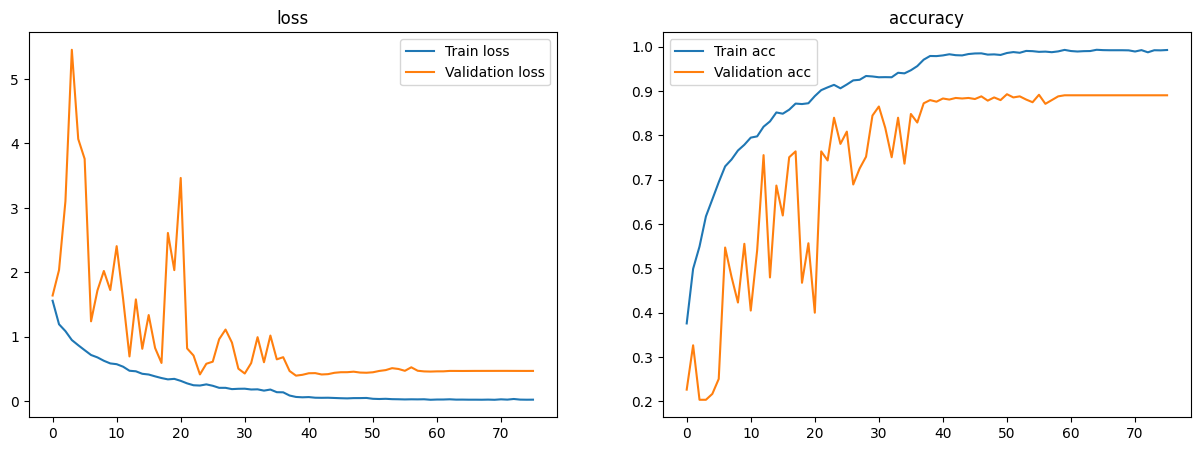

In [80]:
plot_history(history)

In [81]:
model.evaluate(test_ds)

13/13 [==============================] - 0s 17ms/step - loss: 0.4520 - accuracy: 0.8928


[0.45198121666908264, 0.8927711248397827]

In [65]:
#model.save("model_val_loss:0.-val_accuracy:0.")

In [66]:
# model_1 = load_model("model_val_loss-0.2979-val_accuracy-0.8940")

In [67]:
# model_1.evaluate(test_ds)